Epoch 1/50
449/449 [==============================] - 213s 469ms/step - loss: 1.6631 - accuracy: 0.3320 - val_loss: 1.7455 - val_accuracy: 0.3399
Epoch 2/50
449/449 [==============================] - 210s 468ms/step - loss: 1.3915 - accuracy: 0.4707 - val_loss: 1.6629 - val_accuracy: 0.3922
Epoch 3/50
449/449 [==============================] - 211s 470ms/step - loss: 1.2912 - accuracy: 0.5096 - val_loss: 1.8037 - val_accuracy: 0.3487
Epoch 4/50
449/449 [==============================] - 211s 470ms/step - loss: 1.2207 - accuracy: 0.5368 - val_loss: 1.3378 - val_accuracy: 0.5085
Epoch 5/50
449/449 [==============================] - 211s 469ms/step - loss: 1.1812 - accuracy: 0.5522 - val_loss: 1.1965 - val_accuracy: 0.5538
Epoch 6/50
449/449 [==============================] - 210s 467ms/step - loss: 1.1441 - accuracy: 0.5669 - val_loss: 1.5416 - val_accuracy: 0.4694
Epoch 7/50
449/449 [==============================] - 211s 470ms/step - loss: 1.1157 - accuracy: 0.5786 - val_loss: 1.1573 -

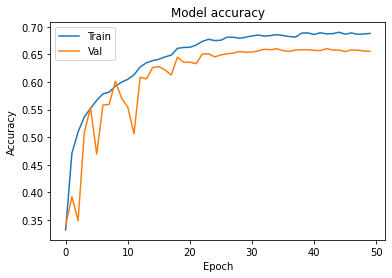

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load the CSV file containing the image pixels and labels
data = pd.read_csv('fer2013.csv')

# Extract the pixels and labels
X = []
y = []
for index, row in data.iterrows():
    pixels = [int(pixel) for pixel in row['pixels'].split()]
    X.append(np.array(pixels).reshape((48, 48, 1)))
    y.append(row['emotion'])
X = np.array(X) / 255.0
y = np.array(y)

# Split the dataset into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the EfficientNetB0 model architecture
inputs = Input(shape=(48, 48, 1))
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(units=7, activation='softmax')(x)
model = Model(inputs, outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# Define learning rate reduction parameters
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
history = model.fit(
datagen.flow(X_train, y_train, batch_size=64),
validation_data=(X_val, y_val),
epochs=50,
callbacks=[learning_rate_reduction])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [4]:
model.save_weights('model_weights.h5')